## ID : 816000325
## Name: Ajay Sieunarine
## Email: ajay.sieunarine@my.uwi.edu

# Part A

In [639]:
import pandas as pd # pandas for reading csvs and for dataframes
from matplotlib import pyplot as plt # for plotting graphs
import seaborn as sns # more graphs
import numpy as np # library to help with data structs, np.array etc
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression # for regression, predictions
from sklearn.svm import SVC, LinearSVC # support vector machine
from sklearn.ensemble import RandomForestClassifier # ?
from sklearn.neighbors import KNeighborsClassifier # yes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron # ?
from sklearn.linear_model import SGDClassifier # ?
from sklearn.tree import DecisionTreeClassifier # yes
from sklearn.cluster import KMeans # yes
from sklearn.pipeline import Pipeline # ?

%matplotlib inline
plt.style.use('dark_background') # turn off for light theme
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [640]:
# import data
# read training set into dataframe, csv delimited by ',', and with no header
df = pd.read_csv('creditcard_approval.csv', sep=',', header=None) 

In [641]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [642]:
df.dtypes # show the datatype of each col

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [643]:
df.shape # (number of rows, number of cols)

(690, 16)

## Data Cleaning

Columns that need their datatype changed will be looked at more thoroughly.

- The data will now be analyzed and cleaned accordingly.
- Convert the columns that SHOULD be floats, into floats.
- Encode the last column to be binary, where 1 => + => approved, 0 => - => rejected.
- Encode object columns to have correpsonding integer values.
    - Column 13 will retain its actual values and be converted to integers, and any outliers will be -1

Encoding the object columns is important since PCA requires numeric data.

In [644]:
enc1 = LabelEncoder()
enc1.fit(df[1])
print(enc1.classes_)
print(df[1].describe()) 
# based on the output, this column needs cleaning

['13.75' '15.17' '15.75' '15.83' '15.92' '16.00' '16.08' '16.17' '16.25'
 '16.33' '16.50' '16.92' '17.08' '17.25' '17.33' '17.42' '17.50' '17.58'
 '17.67' '17.83' '17.92' '18.00' '18.08' '18.17' '18.25' '18.33' '18.42'
 '18.50' '18.58' '18.67' '18.75' '18.83' '18.92' '19.00' '19.17' '19.33'
 '19.42' '19.50' '19.58' '19.67' '19.75' '20.00' '20.08' '20.17' '20.25'
 '20.33' '20.42' '20.50' '20.67' '20.75' '20.83' '21.00' '21.08' '21.17'
 '21.25' '21.33' '21.42' '21.50' '21.58' '21.67' '21.75' '21.83' '21.92'
 '22.00' '22.08' '22.17' '22.25' '22.33' '22.42' '22.50' '22.58' '22.67'
 '22.75' '22.83' '22.92' '23.00' '23.08' '23.17' '23.25' '23.33' '23.42'
 '23.50' '23.58' '23.75' '23.92' '24.08' '24.17' '24.33' '24.42' '24.50'
 '24.58' '24.75' '24.83' '24.92' '25.00' '25.08' '25.17' '25.25' '25.33'
 '25.42' '25.50' '25.58' '25.67' '25.75' '25.83' '25.92' '26.00' '26.08'
 '26.17' '26.25' '26.33' '26.50' '26.58' '26.67' '26.75' '26.83' '26.92'
 '27.00' '27.17' '27.25' '27.33' '27.42' '27.58' '2

In [645]:
enc2 = LabelEncoder()
enc2.fit(df[2])
print(enc2.classes_)
print(df[2].describe()) 
# no cleaning needed

[ 0.     0.04   0.08   0.085  0.125  0.165  0.17   0.205  0.21   0.25
  0.29   0.335  0.375  0.415  0.42   0.46   0.5    0.54   0.58   0.585
  0.625  0.665  0.67   0.705  0.71   0.75   0.79   0.83   0.835  0.875
  0.915  0.96   1.     1.04   1.08   1.085  1.125  1.165  1.21   1.25
  1.29   1.335  1.375  1.415  1.46   1.5    1.54   1.585  1.625  1.665
  1.71   1.75   1.79   1.835  2.     2.04   2.085  2.125  2.165  2.21
  2.25   2.29   2.335  2.415  2.46   2.5    2.54   2.665  2.71   2.75
  2.835  2.875  3.     3.04   3.085  3.125  3.165  3.25   3.29   3.335
  3.375  3.5    3.54   3.625  3.75   3.79   4.     4.04   4.085  4.125
  4.165  4.25   4.415  4.46   4.5    4.585  4.625  4.71   4.75   4.79
  4.915  5.     5.04   5.085  5.125  5.25   5.29   5.415  5.5    5.625
  5.665  5.71   5.835  5.875  6.     6.04   6.165  6.21   6.5    6.625
  6.665  6.75   7.     7.04   7.08   7.25   7.5    7.54   7.585  7.625
  7.835  8.     8.125  8.17   8.46   8.5    8.585  8.665  9.     9.17
  9.25   9.3

In [646]:
enc3 = LabelEncoder()
enc3.fit(df[7])
print(enc3.classes_)
print(df[7].describe()) 
# no cleaning needed

[ 0.     0.04   0.085  0.125  0.165  0.21   0.25   0.29   0.335  0.375
  0.415  0.455  0.46   0.5    0.54   0.585  0.625  0.665  0.71   0.75
  0.79   0.795  0.835  0.875  0.96   1.     1.04   1.085  1.165  1.21
  1.25   1.29   1.335  1.375  1.415  1.46   1.5    1.54   1.585  1.625
  1.665  1.71   1.75   1.835  1.875  1.96   2.     2.04   2.085  2.125
  2.165  2.25   2.29   2.335  2.375  2.415  2.46   2.5    2.54   2.585
  2.625  2.71   2.75   2.79   3.     3.04   3.085  3.125  3.165  3.17
  3.25   3.335  3.5    3.75   3.96   4.     4.165  4.25   4.29   4.335
  4.5    4.58   4.625  4.75   5.     5.04   5.085  5.125  5.165  5.25
  5.335  5.375  5.5    5.665  5.75   6.     6.04   6.29   6.5    6.75
  7.     7.375  7.415  7.5    7.585  7.875  7.96   8.     8.29   8.5
  8.625  8.665  9.     9.46  10.    10.75  11.    11.5   12.5   12.75
 13.    13.5   13.875 14.    14.415 15.    15.5   16.    17.5   18.
 20.    28.5  ]
count    690.000000
mean       2.223406
std        3.346513
min        0

In [647]:
enc3 = LabelEncoder()
enc3.fit(df[10])
print(enc3.classes_)
print(df[10].describe()) 
# no cleaning needed

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 23 40 67]
count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: 10, dtype: float64


In [648]:
enc3 = LabelEncoder()
enc3.fit(df[13])
print(enc3.classes_)
print(df[13].describe()) 
# this col will be converted to int, so it needs to be cleaned and then converted

def prune13(x):
    if x == '?':
        return -1
    else:
        return int(x)

df['temp'] = df[13].apply(
    lambda x: prune13(x)
)

df[13] = df['temp']
del df['temp']

enc3 = LabelEncoder()
enc3.fit(df[13])
print(enc3.classes_)
print(df[13].describe()) 

['00000' '00017' '00020' '00021' '00022' '00024' '00028' '00029' '00030'
 '00032' '00040' '00043' '00045' '00049' '00050' '00052' '00056' '00060'
 '00062' '00070' '00073' '00075' '00076' '00080' '00086' '00088' '00092'
 '00093' '00094' '00096' '00099' '00100' '00102' '00108' '00110' '00112'
 '00117' '00120' '00121' '00128' '00129' '00130' '00132' '00136' '00140'
 '00141' '00144' '00145' '00150' '00152' '00154' '00156' '00160' '00163'
 '00164' '00167' '00168' '00170' '00171' '00174' '00176' '00178' '00180'
 '00181' '00186' '00188' '00195' '00200' '00202' '00204' '00208' '00210'
 '00211' '00212' '00216' '00220' '00221' '00224' '00225' '00228' '00230'
 '00231' '00232' '00239' '00240' '00250' '00252' '00253' '00254' '00256'
 '00260' '00263' '00268' '00272' '00274' '00276' '00280' '00288' '00290'
 '00292' '00300' '00303' '00309' '00311' '00312' '00320' '00329' '00330'
 '00333' '00340' '00348' '00349' '00350' '00352' '00356' '00360' '00368'
 '00369' '00370' '00371' '00372' '00375' '00380' '0

In [649]:
enc3 = LabelEncoder()
enc3.fit(df[14])
print(enc3.classes_)
print(df[14].describe()) 
# needs to be converted to int

[     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     25     27     28     32     33     35
     38     40     41     42     44     50     53     55     58     59
     60     67     68     70     80     87     90     98     99    100
    105    108    109    112    113    117    120    122    126    130
    134    140    141    146    147    150    154    158    160    162
    168    173    179    184    195    196    200    204    210    221
    225    228    234    237    245    246    247    251    258    278
    283    284    286    300    314    316    321    327    340    347
    350    351    364    367    375    390    394    396    400    444
    456    458    475    484    500    501    537    540    551    560
    567    582    587    591    600    610    639    678    687    690
    713    722    730    742    750    768    769    790    800    809
    82

In [650]:
enc3 = LabelEncoder()
enc3.fit(df[15])
print(enc3.classes_)
print(df[15].describe()) 
# no cleaning needed, but can be encoded 

['+' '-']
count     690
unique      2
top         -
freq      383
Name: 15, dtype: object


### Clean the columns where data type should be float

In [651]:
def checkWord(word):
    # check the layout of a string and return true if it is a valid float
    # eg "1.32" = True, "1.1a" = false
    word1 = str(word)
    if '.' in word1:
        # temporarily replace the . to determine if the string only contains digits
        if word1.replace('.', '1').isdigit(): 
            return True
        
###################################################################################################
        
def checkCol(col):
    # determine if the column should be checked to be converted to float
    
    # if the column is not a float, check to see if it should be a float
    if col.dtype == 'float' and col.dtype == 'int' and col.dtype == 'int64':
        return False
    
    sList = col.values.tolist()
    
    # check each entry in a non-float column and return true if a dot is found
    for el in sList: # each element in the col will be a string
        if checkWord(el):
            return True

    return False

###################################################################################################

def pruneWord(x):
    # utility function for lambda
    # converts the string in the column to float and return if true, else return 0.0
    if checkWord(x):
        return float(x)
    else:
        return 0.0

###################################################################################################
    
# change cols to float
columns = df.columns
for column in columns:
    if checkCol(df[column]):
        # clean columns of any invalid entries by setting the invalid value to 0.0
        df['temp'] = df[column].apply(
            lambda x: pruneWord(x)
        )
        df[column] = df['temp']
        del df['temp']
        

def encodeTruth(x):
    if x == '+':
        return 1
    else:
        return 0
        
# encode last column
df['temp'] = df[15].apply(
    lambda x: encodeTruth(x)
)
df[15] = df['temp']
del df['temp']

In [652]:
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13      int64
14      int64
15      int64
dtype: object

In [653]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


The int and float columns are clean and accounted for, now to process the categorical columns.

In [654]:
categorical = df.dtypes[df.dtypes == "object"].index # grab index referencing string columns
df[categorical].describe()

,0,3,4,5,6,8,9,11,12
count,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


In [655]:
cat_cols = df[categorical].columns

def printColClasses(index):
    for col in index:
        enc3 = LabelEncoder()
        enc3.fit(df[col])
        print(enc3.classes_)

printColClasses(cat_cols)
    
# since it is sorted, the ? will always retain the same value for each col

['?' 'a' 'b']
['?' 'l' 'u' 'y']
['?' 'g' 'gg' 'p']
['?' 'aa' 'c' 'cc' 'd' 'e' 'ff' 'i' 'j' 'k' 'm' 'q' 'r' 'w' 'x']
['?' 'bb' 'dd' 'ff' 'h' 'j' 'n' 'o' 'v' 'z']
['f' 't']
['f' 't']
['f' 't']
['g' 'p' 's']


In [656]:
for c in cat_cols:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes

printColClasses(cat_cols)

[0 1 2]
[0 1 2 3]
[0 1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0 1 2 3 4 5 6 7 8 9]
[0 1]
[0 1]
[0 1]
[0 1 2]


In [657]:
print(df.head())
print(df.dtypes)

   0      1      2   3   4   5   6     7   8   9   10  11  12   13   14  15
0   2  30.83  0.000   2   1  13   8  1.25   1   1   1   0   0  202    0   1
1   1  58.67  4.460   2   1  11   4  3.04   1   1   6   0   0   43  560   1
2   1  24.50  0.500   2   1  11   4  1.50   1   0   0   0   0  280  824   1
3   2  27.83  1.540   2   1  13   8  3.75   1   1   5   1   0  100    3   1
4   2  20.17  5.625   2   1  13   8  1.71   1   0   0   0   2  120    0   1
0        int8
1     float64
2     float64
3        int8
4        int8
5        int8
6        int8
7     float64
8        int8
9        int8
10      int64
11       int8
12       int8
13      int64
14      int64
15      int64
dtype: object


The data is now clean and will be split into training and testing sets.

In [658]:
# split the cleaned dataframe into training and testing sets

# drop the last column since it is used as the target varaible and does not contribute to the training/testing data
X_df = df.drop(15, axis=1)
# print(X_df)

# choose target variable y
y = df[15]
# print(y)

# make training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, y, test_size=0.3) # 30% of the data will be used for testing
print(Y_train)

394    0
205    1
500    1
192    1
591    1
      ..
360    0
598    1
452    0
426    0
496    1
Name: 15, Length: 483, dtype: int64


The data will now be standardized and transformed using PCA with 95% variance

In [659]:
scaler = StandardScaler() # remove all mean values and scale to unit variance
scaler.fit(X_train) 
X_train = scaler.transform(X_train)

pca = PCA(0.95) # principle component analysis
pca.fit(X_train)
pca.n_components_

X_train = pca.transform(X_train)
X_train = pd.DataFrame(X_train)

In [660]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

pca = PCA(0.95)
pca.fit(X_test)
pca.n_components_

X_test = pca.transform(X_test)
X_test = pd.DataFrame(X_test)

In [662]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(GaussianNB())
clfs.append(Perceptron())
clfs.append(LinearSVC())
clfs.append(SGDClassifier())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_estimators=100))
clfs

names = []
scores = []
for classifier in clfs:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    name = str(classifier).split('(')[0] # remove everything after the first brackets 
    print('-------------------------------------------')
    print(name, acc)
    names.append(name)
    scores.append(acc)

-------------------------------------------
LogisticRegression 70.05
-------------------------------------------
SVC 71.5
-------------------------------------------
KNeighborsClassifier 72.46
-------------------------------------------
GaussianNB 59.9
-------------------------------------------
Perceptron 69.08
-------------------------------------------
LinearSVC 69.08
-------------------------------------------
SGDClassifier 68.6
-------------------------------------------
DecisionTreeClassifier 67.63


C:\Users\idisc\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
RandomForestClassifier 74.88


(40, 100)

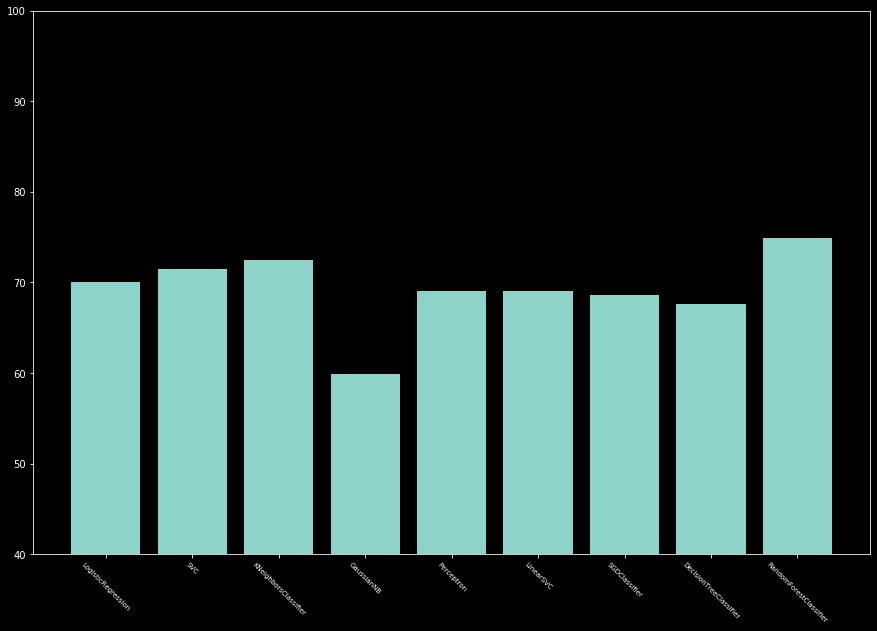

In [663]:
plt.figure(figsize=(15,10))
plt.bar(names, scores)
plt.xticks(rotation=-45)
plt.ylim(40, 100)